# Potato Disease Classification

### Import all the Dependencies

In [72]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers

### Set all the Constants

In [73]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

### Import data into tensorflow dataset object

In [74]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [75]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [76]:
len(dataset)

68

In [77]:
2152 / BATCH_SIZE

67.25

In [78]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(image_batch[0].numpy())

(32, 256, 256, 3)
[[[191. 186. 192.]
  [186. 181. 187.]
  [185. 180. 186.]
  ...
  [190. 185. 189.]
  [200. 195. 199.]
  [198. 193. 197.]]

 [[196. 191. 197.]
  [191. 186. 192.]
  [188. 183. 189.]
  ...
  [187. 182. 186.]
  [198. 193. 197.]
  [197. 192. 196.]]

 [[198. 193. 199.]
  [192. 187. 193.]
  [189. 184. 190.]
  ...
  [186. 181. 185.]
  [196. 191. 195.]
  [196. 191. 195.]]

 ...

 [[168. 164. 163.]
  [170. 166. 165.]
  [166. 162. 161.]
  ...
  [157. 152. 159.]
  [155. 150. 157.]
  [157. 152. 159.]]

 [[161. 160. 158.]
  [163. 162. 160.]
  [158. 157. 155.]
  ...
  [152. 147. 154.]
  [153. 148. 155.]
  [160. 155. 162.]]

 [[168. 168. 166.]
  [151. 151. 149.]
  [146. 145. 143.]
  ...
  [144. 139. 146.]
  [140. 135. 142.]
  [141. 136. 143.]]]


## Visualize some of the images from our dataset

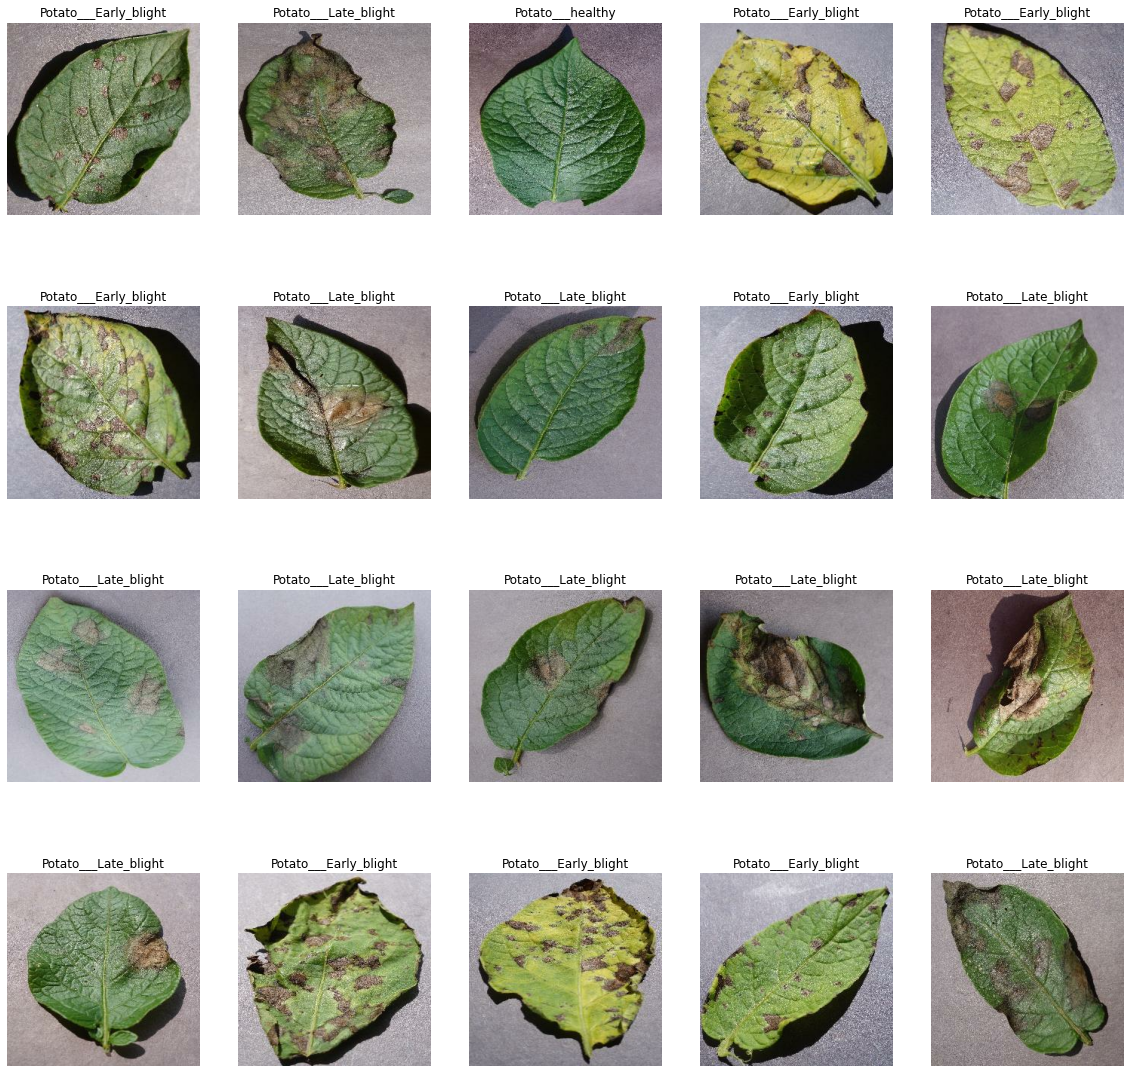

In [79]:
# showing some images
plt.figure(figsize=(20, 20))

for image_batch, label_batch in dataset.take(1):
    for i in range(20):
        ax = plt.subplot(4, 5, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

80% ==> training
20% ==> 10% validation, 10% test

## Function to Split Dataset

Dataset should be bifurcated into 3 subsets, namely:

- Training: Dataset to be used while training
- Validation: Dataset to be tested against while training
- Test: Dataset to be tested against after we trained a model

In [80]:
train_size = 0.8
train_size = int(len(dataset) * train_size)
train_size

54

In [81]:
# Separating training data
train_ds = dataset.take(train_size)
len(train_ds)

54

In [82]:
# Skipping train data
test_ds = dataset.skip(train_size)
len(test_ds)

14

In [83]:
# Getting validation data
val_size = 0.1
val_size = int(len(dataset)*val_size)

In [84]:
val_ds = test_ds.take(val_size)
len(val_ds)

6

In [85]:
test_df = test_ds.skip(val_size)
len(test_df)

8

In [86]:
# Function to perform dataset division in training, test and validation
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_dataset = ds.take(train_size)
    val_dataset = ds.skip(train_size).take(val_size)
    test_dataset = ds.skip(train_size).skip(val_size)

    return train_dataset, val_dataset, test_dataset

In [87]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [88]:
print("train_ds =", len(train_ds))
print("val_ds =", len(val_ds))
print("test_ds =", len(test_ds))

train_ds = 54
val_ds = 6
test_ds = 8


## Cache, Shuffle, and Prefetch the Dataset

In [89]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)